In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data_preprocessed_new.csv")
col_y = df.columns.to_numpy()[-1]
col_x = df.columns.to_numpy()[1:-2]

df_y = np.reshape(df["HeartDisease"].to_numpy(),(len(df),1))

df_x = df.to_numpy()[:,1:-2]

# binary_encode(df_y,[0])

# binary_encode(df_x,[1,2,3,6,7,11,14,15,16])

# df_x,col_x = one_hot(df_x,col_x,[8,9,10,12])


# normalize(df_x,[0,4,5,13])


In [2]:
df_temp = pd.DataFrame(df_x,columns = col_x)
df_temp.head ()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,...,"No, borderline diabetes",Yes_Diabetic,Yes (during pregnancy),No_PhysicalActivity,Yes_PhysicalActivity,No_Asthma,Yes_Asthma,No_KidneyDisease,Yes_KidneyDisease,No_SkinCancer
0,-1.844750,-0.046751,3.281069,-1.460354,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,-1.256338,-0.424070,-0.490039,-0.067601,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.628776,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,-0.647473,-0.424070,-0.490039,-0.763977,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,0.628776,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


# Without Sampling

In [3]:
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
x_train, x_test, y_train, y_test = train_test_split(
    df_x.astype("float64"), df_y.astype('int32'), test_size=0.3, random_state=265)
sampling = False


# With Oversampling

In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df_x.astype("float64"), df_y.astype('int32'), test_size=0.3, random_state=383)
from imblearn.under_sampling import ClusterCentroids 
from imblearn.over_sampling import RandomOverSampler

cc = ClusterCentroids(random_state=383)
ros = RandomOverSampler(random_state=383)
x_train, y_train = ros.fit_resample(x_train, y_train)
sampling = True

# x_train, y_train = cc.fit_resample(x_train, y_train)

In [147]:
df_save_y = pd.DataFrame(y_test,columns=[col_y])

In [148]:
df_save = pd.concat([pd.DataFrame(x_test,columns=col_x)
, df_save_y], axis=1)
df_save.to_csv("testset.csv")

In [149]:
df_save.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,...,Yes_Diabetic,Yes (during pregnancy),No_PhysicalActivity,Yes_PhysicalActivity,No_Asthma,Yes_Asthma,No_KidneyDisease,Yes_KidneyDisease,No_SkinCancer,HeartDisease
0,4.176247,-0.424070,1.395515,-0.067601,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0
1,0.622175,-0.424070,-0.490039,-0.763977,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0
2,-1.408948,0.456341,-0.490039,-0.067601,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0
3,2.511702,-0.424070,-0.238631,-1.460354,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0
4,0.615882,-0.424070,0.138479,0.628776,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0


# Models

Accuracy: 0.7473603018584726
F1 scores for 2 classes: [0.84332053 0.34809037]


Text(0.5, 1.0, 'Confusion Matrix of LR with oversampling')

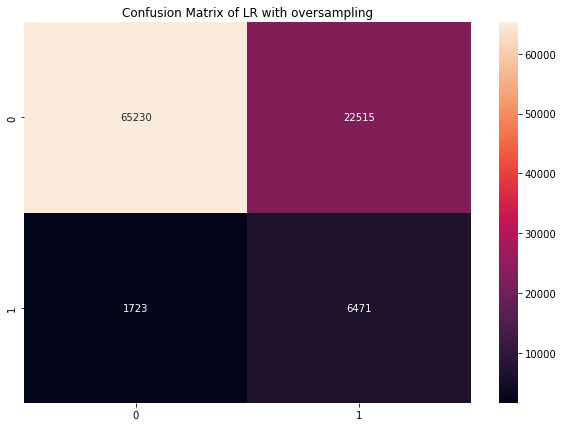

In [141]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

y_pred = clf.predict(x_test)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print("Accuracy:",accuracy_score(y_test, y_pred))
print("F1 scores for 2 classes:",f1_score(y_test, y_pred, average=None))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
ax = plt.axes()
sn.heatmap(cm, annot=True,fmt='d',ax=ax)
ax.set_title('Confusion Matrix of LR {} oversampling'.format("with" if sampling == True else "without"))

/var/folders/mj/p0x7k3q10cz17qd87bycw9140000gn/T/ipykernel_18546/1774062891.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2 = RandomForestClassifier(max_depth=20, random_state=265,n_jobs=-1).fit(x_train,y_train)


Accuracy: 0.9144977537810484
F1 scores for 2 class: [0.95497632 0.15302013]


Text(0.5, 1.0, 'Confusion Matrix of RF without oversampling')

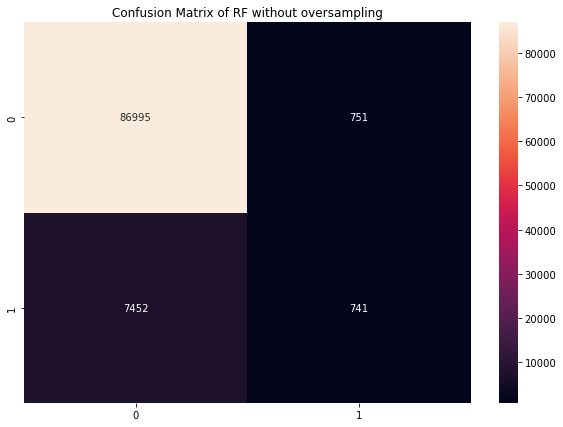

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(max_depth=20, random_state=265,n_jobs=-1).fit(x_train,y_train)
y_pred = clf2.predict(x_test)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))
print("F1 scores for 2 class:",f1_score(y_test, y_pred, average=None))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
ax = plt.axes()
sn.heatmap(cm, annot=True,fmt='d',ax=ax)
ax.set_title('Confusion Matrix of RF {} oversampling'.format("with" if sampling == True else "without"))

In [127]:
col_x

array(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Female',
       'Male', 'American Indian/Alaskan Native', 'Asian', 'Black',
       'Hispanic', 'Other', 'White', 'Excellent', 'Fair', 'Good', 'Poor',
       'Very good', 'No_Smoking', 'Yes_Smoking', 'No_DrinkAlcohol',
       'Yes_DrinkAlcohol', 'No_Stroke', 'Yes_Stroke', 'No_DiffWalking',
       'Yes_DifficultWalking', '18-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80 or older', 'No_Diabetic', 'No, borderline diabetes',
       'Yes_Diabetic', 'Yes (during pregnancy)', 'No_PhysicalActivity',
       'Yes_PhysicalActivity', 'No_Asthma', 'Yes_Asthma',
       'No_KidneyDisease', 'Yes_KidneyDisease', 'No_SkinCancer'],
      dtype=object)

# Coef of LR

In [143]:
print("coefficient for each variable(largest 15) {} sampling".format("with" if sampling == True else "without"))

print(30*"=")
coef = clf.coef_[0]

dic = {}
for i in range(len(col_x)):
    dic[col_x[i]]=round(coef[i],2)
#     print("{}: {}".format(col[i],round(coef[i],2)))
    
sorted_values = sorted(dic.values(),reverse=True) # Sort the values
sort = []
visited= []
for i in sorted_values:
    
    for k in dic.keys():
        
        if dic[k] == i and (k not in visited):
            
            sort.append((k,i))
            visited.append(k)
            break
for i in range(15):
    print("{}: {}".format(sort[i][0],sort[i][1]))

coefficient for each variable(largest 15) with sampling
AgeCategory_80 or older: 1.73
AgeCategory_75-79: 1.43
AgeCategory_70-74: 1.18
AgeCategory_65-69: 0.91
GenHealth_Poor: 0.9
Yes_Stroke: 0.65
AgeCategory_60-64: 0.6
GenHealth_Fair: 0.58
Sex_Male: 0.4
AgeCategory_55-59: 0.36
Yes_Diabetic: 0.35
Yes_KidneyDisease: 0.32
Yes_Smoking: 0.22
Race_American Indian/Alaskan Native: 0.19
Yes_Asthma: 0.19


In [70]:
def normalize(df,indexes):
    
    for index in indexes:
        min_ = min(df[:,index])
        max_ = max(df[:,index])
        
        df[:,index] = (df[:,index]-min_)/(max_-min_)

In [40]:
def binary_encode(df,indexes):
    
    for index in indexes:
        
        for i in range(len(df)):
            cate = df[i][index]
            
            if cate =="Yes" or cate =="Male":

                  
                df[i][index]=1
            else:
                df[i][index]=0
                    

In [66]:
def one_hot(df,col,indexes):
    
    indexes.sort()
    
    
    for k in range(len(indexes)):
        index = indexes[k]-k
#         if indexes[k]==8:
#             print(col[8])
        categories = []
        for i in range(len(df)):
            categ = df[i][index]
            if categ not in categories:
                categories.append(categ)

        dummy_cols = np.empty((len(df),len(categories)))    
        for i in range(len(df)):
            categ_index = categories.index(df[i][index])
            one_hot = np.zeros(len(categories))
            one_hot[categ_index]=1
            dummy_cols [i] = one_hot

        col_name = np.empty(len(categories),dtype=object)
        orig_name = str(col[index])
        for i in range(len(col_name)):
            cate_name = orig_name+"_category_{}({})".format(i,categories[i])
            col_name[i]=cate_name
        col = np.delete(col,index,0)

        col = np.hstack((col,col_name))

        df = np.delete(df,index,1)
        df = np.hstack((df,dummy_cols))

    return df,col
    
            

In [118]:
a = [1,2,3,4]
a[:-2]

[1, 2]